In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.applications import VGG16
from keras.activations import relu, tanh
from keras.optimizers import Adagrad
from keras.losses import binary_crossentropy
from keras.layers import Dropout, Dense, Conv1D, MaxPool1D, Activation, Flatten, Input, Conv2D, MaxPooling2D, MaxPool2D,BatchNormalization

from skimage import io
from keras.models import Model
from skimage import io
from keras.optimizers import Adam, Adadelta, Adam, RMSprop

import cv2, io

from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['train', 'test', 'train.csv', 'sample_submission.csv']


In [2]:
train = pd.read_csv("../input/train.csv")
train.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [3]:
trainImageList = os.listdir("../input/train/train/")
trainImageList[:5]

['655c71d8c3f3d61f3797545e7d0414ce.jpg',
 '7d90461ee8d112a81025637781248f2b.jpg',
 '79174429db5e3d92e6e78c29cb73f520.jpg',
 '41a5ecccc300eeb1176e06388516f0c1.jpg',
 '65741596faaaea9a547ae2314771319e.jpg']

In [4]:
trainImageList[0]

'655c71d8c3f3d61f3797545e7d0414ce.jpg'

In [5]:
import skimage, sklearn

image =  skimage.io.imread("../input/train/train/0014d7a11e90b62848904c1418fc8cf2.jpg", as_gray=False)
image.shape

(32, 32, 3)

In [6]:
from skimage.filters import roberts, sobel, scharr, prewitt

# edge_roberts = roberts(image)
# edge_sobel = sobel(image)

# plt.imshow(edge_sobel);

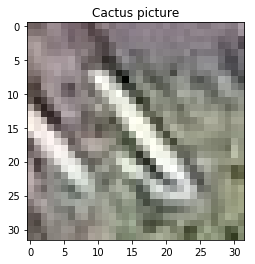

In [7]:
plt.imshow(image)
plt.title('Cactus picture')
plt.show()

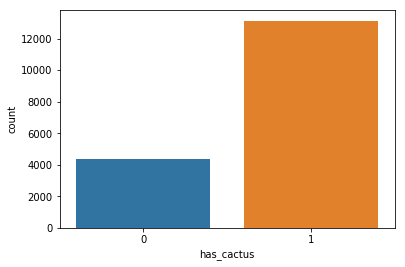

In [8]:
sns.countplot(train['has_cactus']);

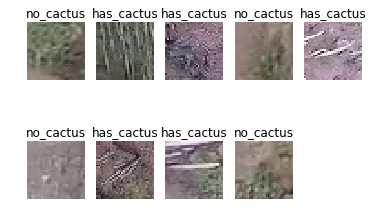

In [9]:
cnt = 0
for i in train[16+30:25+30].values:
    cnt += 1
    image = skimage.io.imread(f"../input/train/train/{i[0]}", as_gray=False)
    plt.subplot(250+cnt)
    plt.axis("off")
    plt.imshow(image)
    plt.title(['no_cactus','has_cactus'][i[1]])
plt.show()

In [10]:
train.shape, image.shape

((17500, 2), (32, 32, 3))

## Transformation

In [11]:
Y = to_categorical(num_classes=2, y=train['has_cactus'])
Y.shape, Y[:10]

((17500, 2), array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]], dtype=float32))

## Create CNN Model

In [12]:
num_classes = 2
epochs = 5
batch_size = 128
image.shape, train.columns

((32, 32, 3), Index(['id', 'has_cactus'], dtype='object'))

In [30]:
inputs = Input(shape=(32, 32, 3))

# vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv1 = Conv2D(256, (4, 4), activation='elu')(inputs)
batch1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(padding='same', pool_size=(2,2))(batch1)

conv2 = Conv2D(128, (4, 4), activation='relu')(pool1)
batch2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(padding='valid', pool_size=(3,3))(conv2)

conv3 = Conv2D(64, (3, 3), activation='elu')(pool2)
batch3 = BatchNormalization()(conv3)
pool3 = MaxPooling2D(padding='same', pool_size=(3,3))(batch3)

flatten = Flatten()(pool3)

dropout = Dropout(rate = 0.7)(flatten)

output = Dense(2, activation='sigmoid')(dropout)

model = Model(inputs=inputs, outputs=output)

In [31]:
# vgg_conv.summary()

In [32]:
# model = Sequential()
# # Add the vgg convolutional base model
# model.add(vgg_conv)
 
# # Add new layers
# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(1 - .70))
# model.add(Dense(2, activation='sigmoid'))

## Train Model

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 256)       12544     
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 29, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       524416    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 64)          73792     
__________

In [34]:
train['d'] = train['id'].apply(lambda x : "../input/train/train/"+x)
train['d'].head()

0    ../input/train/train/0004be2cfeaba1c0361d39e2b...
1    ../input/train/train/000c8a36845c0208e833c79c1...
2    ../input/train/train/000d1e9a533f62e55c289303b...
3    ../input/train/train/0011485b40695e9138e92d0b3...
4    ../input/train/train/0014d7a11e90b62848904c141...
Name: d, dtype: object

In [35]:
# train['data'] = train['d'].apply(lambda y: cv2.imread(y))
# train['data'].head()
Y.shape

(17500, 2)

In [36]:
from skimage import io

all_images = []
for image_path in train['d'].values:
#     print(image_path)
    img = io.imread(image_path, as_gray=False)
    img = img.reshape([32, 32,3])
    all_images.append(img/255)
X = np.array(all_images)
X.shape, type(X)

((17500, 32, 32, 3), numpy.ndarray)

In [37]:
X[0].shape
optimizer = Adagrad(lr=0.001, decay=1e-3)

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 256)       12544     
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 29, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       524416    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 64)          73792     
__________

In [39]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [40]:
#Splits
# X_val = x_train[16000:]
# Y_val = Y[16000:]

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=123)
x_train.shape, y_train.shape

((14000, 32, 32, 3), (14000, 2))

In [41]:
from keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=8)


In [42]:
model.fit(x=x_train, y=y_train, epochs=32, batch_size=512, shuffle=True, 
          validation_split=0.2, callbacks=[monitor])

Train on 11200 samples, validate on 2800 samples
Epoch 1/32
11200/11200 [==============================] - 2s 211us/step - loss: 0.3679 - acc: 0.8617 - val_loss: 0.1710 - val_acc: 0.9427
Epoch 2/32
11200/11200 [==============================] - 2s 145us/step - loss: 0.1855 - acc: 0.9312 - val_loss: 0.1339 - val_acc: 0.9511
Epoch 3/32
11200/11200 [==============================] - 2s 146us/step - loss: 0.1603 - acc: 0.9413 - val_loss: 0.1462 - val_acc: 0.9530
Epoch 4/32
11200/11200 [==============================] - 2s 146us/step - loss: 0.1359 - acc: 0.9514 - val_loss: 0.1292 - val_acc: 0.9596
Epoch 5/32
11200/11200 [==============================] - 2s 144us/step - loss: 0.1237 - acc: 0.9566 - val_loss: 0.2061 - val_acc: 0.9250
Epoch 6/32
11200/11200 [==============================] - 2s 145us/step - loss: 0.1119 - acc: 0.9607 - val_loss: 0.3346 - val_acc: 0.8757
Epoch 7/32
11200/11200 [==============================] - 2s 148us/step - loss: 0.1045 - acc: 0.9650 - val_loss: 0.1037 - v

## Evaluate Model

In [43]:
score = model.evaluate(x_val, y_val)
score

3500/3500 [==============================] - 0s 106us/step


[0.11314423208577293, 0.964]

In [45]:
# a = np.array([[1.88852847e-01, 9.69758689e-01],
#        [9.99574542e-01, 1.15156174e-04],
#        [3.27082276e-02, 9.89496231e-01]])
# np.where(a > 0.75)

In [68]:
preds = np.array(model.predict(x_val, batch_size=32))
preds = pd.DataFrame(preds)

res = preds[0].apply(lambda x : 0 if x >0.75 else 1)

0       1
1       0
2       1
3       1
4       1
5       1
6       1
7       1
8       0
9       1
10      1
11      0
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      0
20      1
21      0
22      1
23      1
24      0
25      1
26      1
27      1
28      1
29      1
       ..
3470    1
3471    0
3472    0
3473    0
3474    1
3475    1
3476    1
3477    1
3478    1
3479    1
3480    1
3481    1
3482    1
3483    1
3484    1
3485    0
3486    0
3487    1
3488    0
3489    1
3490    1
3491    0
3492    1
3493    0
3494    1
3495    0
3496    1
3497    1
3498    1
3499    0
Name: 0, Length: 3500, dtype: int64

In [69]:
print(classification_report(np.argmax(y_val, axis=1), res))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       848
           1       0.99      0.98      0.98      2652

   micro avg       0.98      0.98      0.98      3500
   macro avg       0.96      0.98      0.97      3500
weighted avg       0.98      0.98      0.98      3500



In [71]:
c = confusion_matrix(np.argmax(y_val, axis=1), res)
c

array([[ 831,   17],
       [  62, 2590]])

## Predict Model

In [ ]:
sns.heatmap(c, annot=True);

## Test Model

In [72]:
testImageList = os.listdir("../input/test/test/")
# testImageList

In [73]:
img = cv2.imread("../input/test/test/f0720f7eac8fd0b72dd78cc7f63f4467.jpg")
img.shape

(32, 32, 3)

In [75]:
test_images = []
for image_path in os.listdir("../input/test/test"):
#     print(image_path)
    img = skimage.io.imread('../input/test/test/'+image_path, as_gray=False)
    img = img.reshape([32, 32,3])
    test_images.append(img/255)
x_test = np.array(test_images)
x_test.shape

(4000, 32, 32, 3)

In [85]:
predTest1 = model.predict(x_test, batch_size=128)

predTest1 = pd.DataFrame(predTest1)

predTest1 = preds[0].apply(lambda x : 0 if x >0.75 else 1)
predTest1

0       1
1       0
2       1
3       1
4       1
5       1
6       1
7       1
8       0
9       1
10      1
11      0
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      0
20      1
21      0
22      1
23      1
24      0
25      1
26      1
27      1
28      1
29      1
       ..
3470    1
3471    0
3472    0
3473    0
3474    1
3475    1
3476    1
3477    1
3478    1
3479    1
3480    1
3481    1
3482    1
3483    1
3484    1
3485    0
3486    0
3487    1
3488    0
3489    1
3490    1
3491    0
3492    1
3493    0
3494    1
3495    0
3496    1
3497    1
3498    1
3499    0
Name: 0, Length: 3500, dtype: int64

## Submit Predictions

In [86]:
submission = pd.read_csv("../input/sample_submission.csv")
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [87]:
# predTest = np.argmax(predTest1, axis=1)

In [92]:
submission['has_cactus'] = pd.Series(predTest1)

In [93]:
submission.to_csv("submission5.csv", index=False)
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,1.0
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.0
2,001ee6d8564003107853118ab87df407.jpg,1.0
3,002e175c3c1e060769475f52182583d0.jpg,1.0
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,1.0


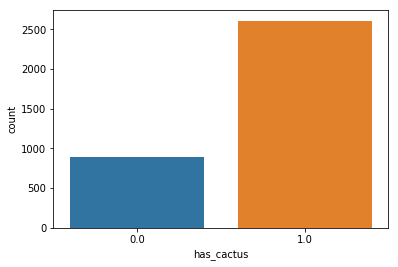

In [97]:
sns.countplot(submission['has_cactus']);

In [98]:
submission[46:55].values

array([['02f33fce768ce764cea1a14c5ef0fe1b.jpg', 1.0],
       ['02f82b5e7a3db0c30bec14dad642c518.jpg', 1.0],
       ['02f8f294a8e0480b08495dee1760d86c.jpg', 1.0],
       ['034bcb31a837f4656e7156d916a02bb6.jpg', 1.0],
       ['03575f3071e381afa7ce6cee4aed9193.jpg', 1.0],
       ['03622becbeb1bf30439384a37d4a7e15.jpg', 1.0],
       ['036842555ac420b9a7bd025db396e525.jpg', 0.0],
       ['036feabe3bb928071be0308c61f387f3.jpg', 1.0],
       ['03756802e560a1b757d2748233489774.jpg', 1.0]], dtype=object)

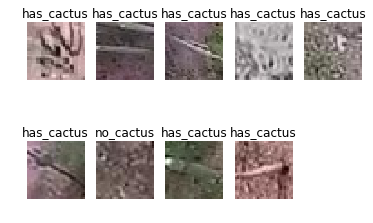

In [99]:
cnt = 0

for i in submission[46:55].values:
    cnt += 1
    image = skimage.io.imread(f"../input/test/test/{i[0]}", as_gray=False)
    plt.subplot(250+cnt)
    plt.axis("off")
    plt.imshow(image)
    plt.title(['no_cactus','has_cactus'][int(i[1])])
plt.show()